This is an experiment where

1. Retrive data from the url and split the data
2. 

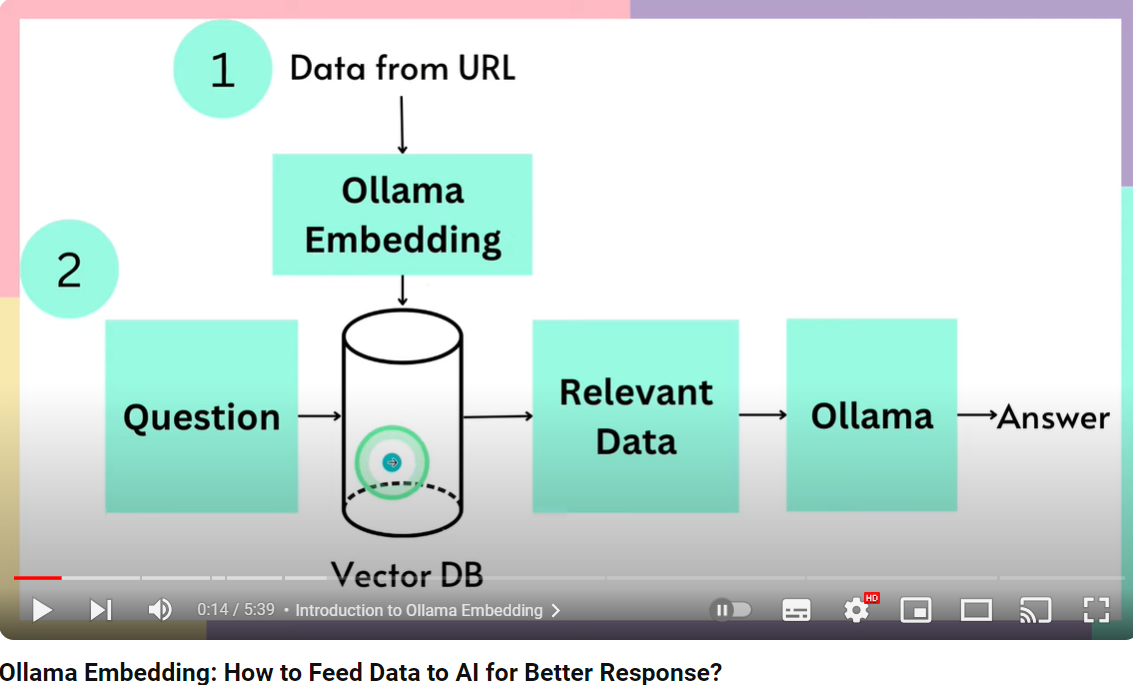

In [2]:
from IPython import display
display.Image("C:\\Users\\eduar\OneDrive - Hochschule Luzern\\Desktop\\IDS\\Master_Thesis\\GenAI_Thesis_Beekeeper\\Experiments\\Ollama_embedding_DB\\Ollama_with _embeddings_db.png")

In [8]:
#! pip install langchain langchain-community langchain-core

In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community import embeddings
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.chat_models import ChatOllama
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.text_splitter import CharacterTextSplitter

# Load the Ollama model
local_model = ChatOllama(model="llama2")

ModuleNotFoundError: No module named 'langchain_community'

Retrieval augmented generation (RAG) is a natural language processing (NLP) technique that combines the strengths of both retrieval- and generative-based artificial intelligence (AI) models

In [2]:
# 1. split the data into chunks
# urls = ["https://flaggerforce.com/",
#         "https://flaggerforce.com/blog/",
#         "https://flaggerforce.com/about-us/"]

urls = ["https://flaggerforce.com/"]
        
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(chunk_size=7500, chunk_overlap=100)
doc_splits = text_splitter.split_documents(documents=docs_list)
doc_splits

[Document(page_content="Home | Flagger Force | Professional Traffic Control\n\n \n\nTap To Call\nLocations\nOrder Traffic Control\n\n  Menu  \n\nAbout Us\n\nService Areas\nCapabilities\nLeadership\nTestimonials\nKeeping Our Communities Moving\nPressroom\n\n\nBlog\nCareers\n\nApply for Field Positions\nApply for Office Positions\nWhat Is It Like to Work Here?\n\n\nContact Us\n\nQuestions & Feedback\nShow Appreciation\nService Areas\n\n\nORDER TRAFFIC CONTROL\n\n\nOrder Traffic Control\n\n About Us\nCapabilities\nBlog\nCareers\nEmployee Portal\nContact Us\nOrder Traffic Control\n \n \n\n  Employee Portal\n\n\n 888.312.3524\nLocations\nWe’re Hiring Crew Members\n \n\n\nAbout Us\n\nService Areas\nCapabilities\nLeadership\nTestimonials\nKeeping Our Communities Moving\nPressroom\n\n\nBlog\nCareers\n\nApply for Field Positions\nApply for Office Positions\nWhat Is It Like to Work Here?\n\n\nContact Us\n\nQuestions & Feedback\nShow Appreciation\nService Areas\n\n\nORDER TRAFFIC CONTROL\n \n \n\

In [3]:
print(type(doc_splits))
print(len(doc_splits))
print(doc_splits[-1])

<class 'list'>
3
page_content="About Us | Flagger Force | Professional Traffic Control\n\n \n\nTap To Call\nLocations\nOrder Traffic Control\n\n  Menu  \n\nAbout Us\n\nService Areas\nCapabilities\nLeadership\nTestimonials\nKeeping Our Communities Moving\nPressroom\n\n\nBlog\nCareers\n\nApply for Field Positions\nApply for Office Positions\nWhat Is It Like to Work Here?\n\n\nContact Us\n\nQuestions & Feedback\nShow Appreciation\nService Areas\n\n\nORDER TRAFFIC CONTROL\n\n\nOrder Traffic Control\n\n About Us\nCapabilities\nBlog\nCareers\nEmployee Portal\nContact Us\nOrder Traffic Control\n \n \n\n  Employee Portal\n\n\n 888.312.3524\nLocations\nWe’re Hiring Crew Members\n \n\n\nAbout Us\n\nService Areas\nCapabilities\nLeadership\nTestimonials\nKeeping Our Communities Moving\nPressroom\n\n\nBlog\nCareers\n\nApply for Field Positions\nApply for Office Positions\nWhat Is It Like to Work Here?\n\n\nContact Us\n\nQuestions & Feedback\nShow Appreciation\nService Areas\n\n\nORDER TRAFFIC CONTR

In [4]:
# 2. Convert documents to embeddings and store them in the vector store
vector_store = Chroma.from_documents(documents=doc_splits,
                                     collection_name="rag_chroma",
                                     embedding=embeddings.ollama.OllamaEmbeddings())    # model='nomic-embed-text'
retriever = vector_store.as_retriever()

In [5]:
# 3. Before retrieval augmented generation
print("Before retrieval augmented generation")
before_rag_template = "What is {topic}"
before_rag_prompt = ChatPromptTemplate.from_template(before_rag_template)
before_rag_chain = before_rag_prompt | local_model | StrOutputParser()
print(before_rag_chain.invoke({"topic": "Flagger Force"}))

Before retrieval augmented generation

Flagger Force is a training and certification program for traffic flaggers, which is a crucial role in ensuring the safety of roadwork sites. The program is designed to provide flaggers with the knowledge and skills necessary to effectively manage traffic flow, communicate with drivers, and prevent accidents at work zones.

The Flagger Force program was developed by the American Association of State Highway and Transportation Officials (AASHTO) in collaboration with the Federal Highway Administration (FHWA). It is a comprehensive training program that covers a range of topics, including:

1. Traffic control principles and practices
2. Flagger techniques and procedures
3. Communication skills for working with drivers
4. Work zone safety and emergency response procedures
5. OSHA regulations and best practices for flaggers
6. Advanced training in areas such as incident management, nighttime work, and winter operations.

The Flagger Force program offe

In [6]:
# 4.  Retrive after RAG
print("Retrive after RAG")
after_rag_template = """Answer the question based only on the following context:
{context}
Question: {question}
"""
after_rag_prompt = ChatPromptTemplate.from_template(after_rag_template)
after_rag_chain = ({"context": retriever, "question":RunnablePassthrough()}
                   | after_rag_prompt 
                   | local_model 
                   | StrOutputParser()
)
print(after_rag_chain.invoke("What is Flagger Force?"))

Retrive after RAG


Number of requested results 4 is greater than number of elements in index 3, updating n_results = 3


Flagger Force is a company that provides traffic control services to various industries, including construction, oil and gas, and transportation. They offer a range of services, including flagging, traffic control, and road closure management. Their goal is to provide safe and efficient traffic flow while minimizing delays and disruptions.

The blog post you provided offers tips and best practices for driving safely in construction zones. These tips include leaving early to account for potential delays, paying attention to road signs and flaggers, and being patient and expectant of unexpected events. The post also highlights the importance of using a spotter when driving in hazardous conditions and the use of technology such as GPS and traffic apps to plan your route and stay informed of traffic conditions.

Overall, Flagger Force is a company that plays an important role in ensuring the safety of both drivers and workers in construction zones by providing trained flaggers and traffic 